### Homework 1 03-702
Yashwant Kathirvel

In [1]:
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# 1.1
df = pd.read_csv('swim100m.csv')
df.head()

,year,time,sex
0,1905,65.8,M
1,1908,65.6,M
2,1910,62.8,M
3,1912,61.6,M
4,1918,61.4,M


In [3]:
# 1.2
df = pd.read_excel('Table 2.8 Waist loss.xls', skiprows=2)
df.tail()

,man,before,after
15,16,103.5,103.0
16,17,82.0,80.0
17,18,101.5,101.5
18,19,103.5,102.6
19,20,93.0,93.0


In [4]:
# 1.3
df = pd.read_excel('GLM_data/Table 2.8 Waist loss.xls', skiprows=2)
df.tail()

,man,before,after
15,16,103.5,103.0
16,17,82.0,80.0
17,18,101.5,101.5
18,19,103.5,102.6
19,20,93.0,93.0


In [5]:
# 2.1 & 2.2
frequency = 1.5
x = np.arange(0, 10, 0.1)
y = np.sin(2*np.pi*frequency*x)
z = np.cos(2*np.pi*frequency*x)
# initialize data frame
df = pd.DataFrame({'Time': x, 
                   'YVals': y, 
                   'ZVals': z})
# print head of data frame
df.head()

,Time,YVals,ZVals
0,0.0,0.000000,1.000000
1,0.1,0.809017,0.587785
2,0.2,0.951057,-0.309017
3,0.3,0.309017,-0.951057
4,0.4,-0.587785,-0.809017


In [6]:
# 2.3 & 2.4
outfile = 'out.txt'
df[10:16][['YVals', 'ZVals']].to_csv(outfile)
print('Data written to {0}'.format(outfile))

Data written to out.txt


In [7]:
# 3.1
df = pd.read_csv('babyboom.dat.txt', sep='\s+', header=None)
df.columns = ['TOB', 'sex', 'Weight', 'Minutes']
df['sex'] = df['sex'].apply(lambda x: "female" if x == 1 else "male")
df.head()

,TOB,sex,Weight,Minutes
0,5,female,3837,5
1,104,female,3334,64
2,118,male,3554,78
3,155,male,3838,115
4,257,male,3625,177


Text(0.5, 1.0, 'All data')

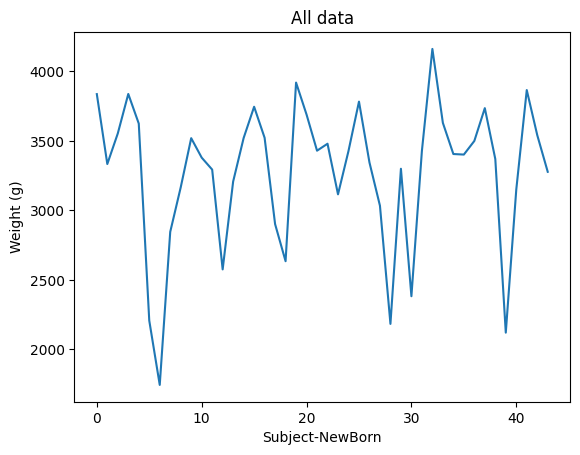

In [8]:
# 3.2.1
plt.plot(df['Weight'])
plt.xlabel('Subject-NewBorn')
plt.ylabel('Weight (g)')
plt.title('All data')

array([[<AxesSubplot: title={'center': 'Minutes'}, xlabel='[sex]'>,
        <AxesSubplot: title={'center': 'TOB'}, xlabel='[sex]'>],
       [<AxesSubplot: title={'center': 'Weight'}, xlabel='[sex]'>,
        <AxesSubplot: >]], dtype=object)

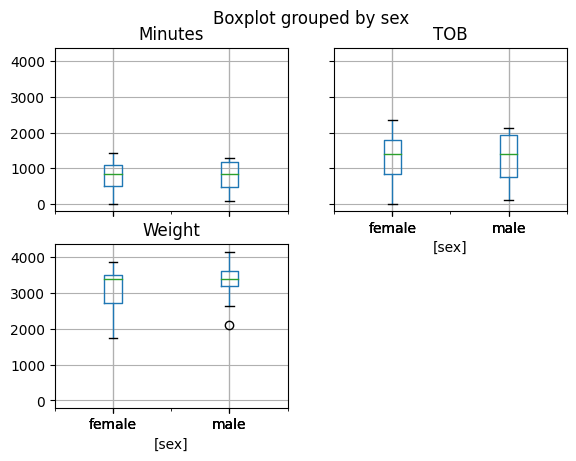

In [9]:
#  3.2.2
df.boxplot(by="sex")

In [10]:
# 3.2.3
grouped_data = df.groupby('sex')
grouped_data.describe()

TOB                                                                   \
       count         mean         std    min     25%     50%      75%     max   
sex                                                                             
female  18.0  1273.000000  737.695218    5.0  837.75  1406.5  1804.25  2355.0   
male    26.0  1311.923077  670.722412  118.0  754.25  1409.5  1937.50  2123.0   

       Weight               ...                  Minutes              \
        count         mean  ...      75%     max   count        mean   
sex                         ...                                        
female   18.0  3132.444444  ...  3517.25  3866.0    18.0  773.000000   
male     26.0  3375.307692  ...  3628.75  4162.0    26.0  799.615385   

                                                          
               std   min     25%    50%      75%     max  
sex                                                       
female  446.050775   5.0  507.75  846.5  1094.25  1435.0  
male    402.687281  78.0  464.25  849.5  1177.50  1283.0  

[2 rows x 24 columns]

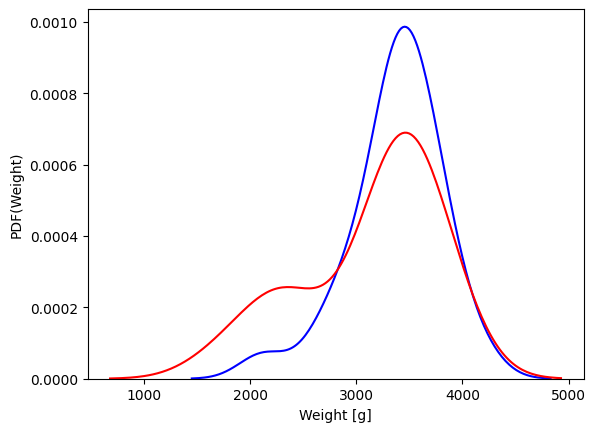

In [11]:
# 3.2.4
df.Weight = np.double(df.Weight) # convert to double
sns.kdeplot(grouped_data.get_group('male').Weight, color='b', label='male')
sns.kdeplot(grouped_data.get_group('female').Weight, color='r', label='female')
plt.xlabel('Weight [g]')
plt.ylabel('PDF(Weight)')
plt.show()

In [12]:
# 3.3 
(k2, pVal) = stats.normaltest(grouped_data.get_group('male').Weight)
print(f'pVal is less than 0.05, so the data is not normally distributed. pVal = {pVal}')

pVal is less than 0.05, so the data is not normally distributed. pVal = 0.02287917589120297


In [13]:
(k2, pVal) = stats.normaltest(grouped_data.get_group('female').Weight)
print(f'pVal is greater than 0.05, so the data is not normally distributed. pVal = {pVal}')

pVal is greater than 0.05, so the data is not normally distributed. pVal = 0.2036809963294718


c:\Users\yashw\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
# 4
array = np.linspace(0, 10, 101)
print(array)
print("Mean =", array.mean())
print("Standard Deviation =", np.std(array, ddof=1))

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
Mean = 5.0
Standard Deviation = 2.9300170647967225


In [15]:
# 5.1
normal_dist = stats.norm(5, 3)

In [16]:
# 5.2
array = np.linspace(-5, 15, 101)
print(array)

[-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2
  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6  5.8  6.
  6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4  8.6  8.8
  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2 11.4 11.6
 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.  14.2 14.4
 14.6 14.8 15. ]


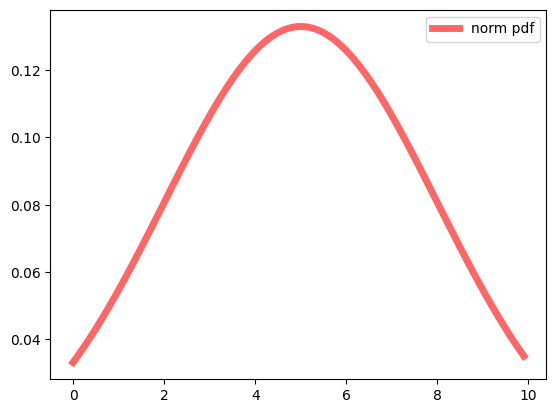

In [20]:
# 5.3
plt.plot(x, normal_dist.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
plt.legend()

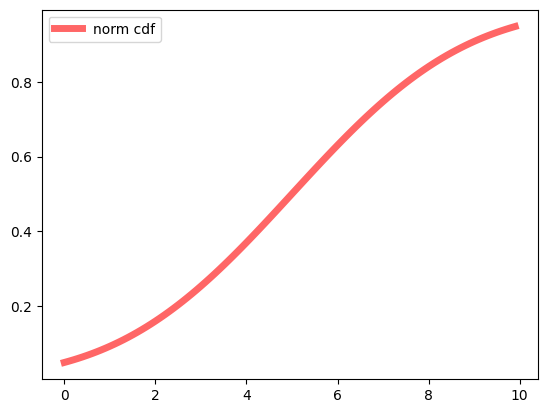

In [21]:
# 5.4
plt.plot(x, normal_dist.cdf(x),
       'r-', lw=5, alpha=0.6, label='norm cdf')
plt.legend()

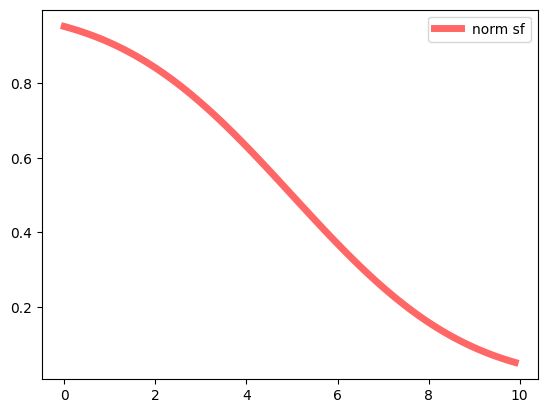

In [22]:
# 5.5
plt.plot(x, normal_dist.sf(x),
       'r-', lw=5, alpha=0.6, label='norm sf')
plt.legend()

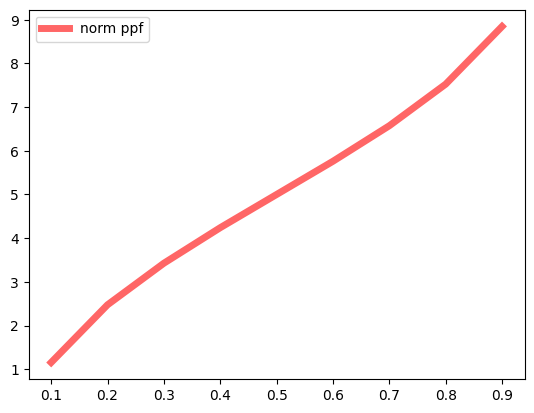

In [23]:
# 5.6
plt.plot(x, normal_dist.ppf(x),
       'r-', lw=5, alpha=0.6, label='norm ppf')
plt.legend()

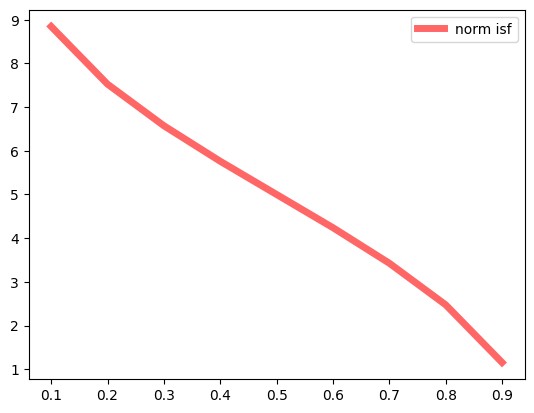

In [24]:
# 5.7
plt.plot(x, normal_dist.isf(x),
       'r-', lw=5, alpha=0.6, label='norm isf')
plt.legend()